# MATH 210 Introduction to Mathematical Computing

## March 3, 2017

1. More definite integrals with QUADPACK
2. Numerical differentiation
    * Central difference formula
    * `scipy.misc.derivative`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. More definite intergrals

### Example: Gamma Function

The gamma funciton $\Gamma(x)$ is an extenstion of the factorial $n!$ in the sense $Gamma(n)= (n-1)!$. It is defined by the infinite integral:

$$
\Gamma(x) = \int_0^{\infty} t^{x-1} e^{-t} dt
$$

In [4]:
import scipy.integrate as spi

In [7]:
x = 5
def f(t):
    return t**(x-1) * np.exp(-t) 

# Gamma function for x = 5
I, abserr = spi.quad(f,0,np.inf)
print(I)
print(abserr)

24.0
8.43464142648149e-09


In [8]:
from scipy.misc import factorial

In [9]:
factorial(5-1)

array(24.0)

In [10]:
from scipy.special import gamma as G

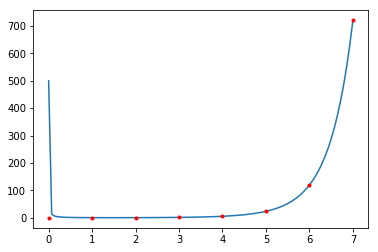

In [11]:
x = np.linspace(0.002,7,100)
y = G(x)

n = np.arange(0,8)
factorials = factorial(n-1)
plt.plot(x,y,n, factorials, 'r.'); 

### Example

Let's verify the integral formula:

In [12]:
n = 2
def f(x):
    return x**(3*n)/(1-x**3)**(1/3)

In [13]:
I, error = spi.quad(f,0,1)
print(I)

0.26871101692362237


In [14]:
true_I = 2*np.pi/(3*(3**0.5)) * G(n+1/3)/(G(1/3)*G(n+1))

In [15]:
true_I 

0.2687110169235879

Let's verify that the approximation `I` is with in the `error` of the exact value of the integral

In [ ]:
np.abs(I-true_I) < error

## 2. Numerical Differentiation

Given a function f(x) we can approximate the value of the derivative at x=a by the formula:

$$
f'(a) \approx \frac{f(a+h)-f(h)}{h}
$$

For some small choice of h.
But we can also approximate the value f'(x) by the formula

$$
f'(a) \approx \frac{f(a)-f(a-h)}{h}
$$
For some small choice of h. But it is usually best to take the average of these (centeral difference formula)

$$
f'(x) \approx \frac{f(a+h)-f(a-h)}{2h}
$$

Let's write a function called `D` which returns the approximation of `f'(x)` using this formula.

In [6]:
def D(f,a,h=0.01):
    """Compute the derivative of f(x) at x=a with stepsize h."""
    return (f(a+h)-f(a-h))/(2*h)

In [7]:
def f(x):
    return x**2

In [8]:
D(f,1)

2.0000000000000018

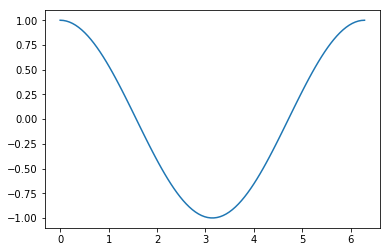

In [9]:
x = np.linspace(0,2*np.pi,100)
y = D(np.sin,x)
plt.plot(x,y)

There's a build-in function in scipy whichh does the exact same things as our D. It's called `scipy.misc.derivative`

In [33]:
from scipy.misc import derivative

In [11]:
x = np.arange(0,5)
D(np.exp,x,0.1)

array([  1.0016675 ,   2.72281456,   7.40137735,  20.11902956,  54.68919246])

In [12]:
derivative(np.exp,x,dx=0.1)

array([  1.0016675 ,   2.72281456,   7.40137735,  20.11902956,  54.68919246])

## Exercises

1. 
$$
\mathrm{erf}(x) = \frac{2}{\sqrt{\pi}} \int_0^x e^{-t^2} \, dt
$$

In [25]:
def erf(x):
    def f(t):
        return np.exp(-t**2)
    I, abserr = spi.quad(f,0,x)
    return print((2/(np.pi**0.5))*I)

In [26]:
erf(1)

0.8427007929497149


In [27]:
erf(2)

0.9953222650189526


In [28]:
erf(3)

0.9999779095030016


In [29]:
erf(4)

0.9999999845827421


In [30]:
erf(5)

0.9999999999984626


2: 
$$
f(x) = \frac{7x^3-5x+1}{2x^4+x^2+1} \ , \ x \in [-5,5]
$$

In [40]:
x = np.linspace(-5,5,1000)

def f(x):
    return (7*x**3-5*x+1)/(2*x**4+x**2+1)

In [41]:
y = derivative(f,x)

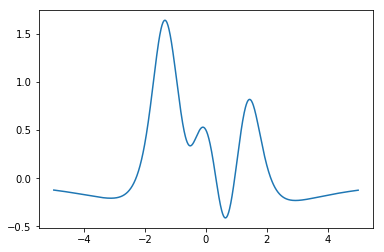

In [42]:
plt.plot(x,y)

In [37]:
derivative?